In [35]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [36]:
def Gabor_filter(k=111, s=10, g=1.2, l=10, p=0, angle=0):
    # get half size
    d = k // 2
    
    # prepare kernel
    gabor = np.zeros((k, k), dtype=np.float32)
    
    # each value
    for y in range(k):
        for x in range(k):
            # distance from center
            px = x - d
            py = y - d
            
            # degree -> radian
            theta = angle / 100. * np.pi
            
            # get kernel x
            _x = np.cos(theta) * px + np.sin(theta) * py 
            
            # get kernel y
            _y = -np.sin(theta) * px + np.cos(theta) * py
            
            # fill kernel
            gabor[y, x] = np.exp(-(_x**2 + g**2 + _y**2) / (2 * s**2)) * np.cos(2*np.pi * _x/l + p)
            
    # kernel normalization
    gabor /= np.sum(np.abs(gabor))
    
    return gabor

In [37]:
def Gabor_filtering(gray, k=111, s=10, g=1.2, l=10, p=0, angle=0):
    # get shape
    h, w = gray.shape
    
    # padding
    gray = np.pad(gray, (k//2, k//2), "edge")
    
    # prepare out image
    out = np.zeros((h, w), dtype=np.float32)
    
    # get gabor filter
    gabor = Gabor_filter(k=k, s=s, g=g, l=l, p=0, angle=angle)
    
    # filtering
    for y in range(h):
        for x in range(w):
            out[y, x] = np.sum(gray[y: y + k, x : x + k] * gabor)
            
    out = np.clip(out, 0, 255)
    out = out.astype(np.uint8)
    
    return out

In [38]:
img = cv2.imread("../assets/imori.jpg").astype(np.float32)
h, w, _ = img.shape
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [39]:
# define angle
As = [0, 45, 90, 135]
# prepare pyplot
plt.subplots_adjust(left=0, right=1, top=1, bottom=0, hspace=0, wspace=0.2)
out = np.zeros([h, w], dtype=np.float32)

<Figure size 432x288 with 0 Axes>

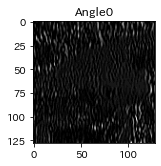

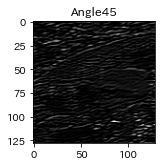

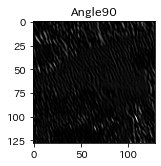

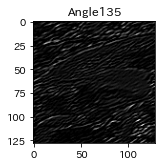

In [46]:
# each angle
for i,A in enumerate(As):
    #gabor filtering
    _out = Gabor_filtering(gray, k=11, s=1.5, g=1.2, l=3, angle=A)
    
    plt.figure(figsize=(10,10))
    plt.subplot(1, 4, i+1)
    plt.imshow(_out, cmap="gray")
    plt.title("Angle" + str(A))
    
    # add gabor filtered image
    out += _out

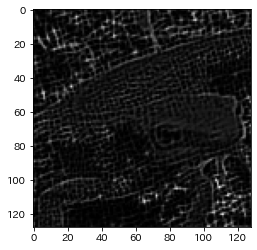

In [41]:
out = out/ out.max() * 255
out = out.astype(np.uint8)
plt.imshow(out, cmap="gray")